###Starter code.
###Kindly upvote if you find this kernel useful. Thanks!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
import pandas as pd
data_main = pd.read_csv('/kaggle/input/covid19-symptoms-checker/Raw-Data.csv')
data_main.shape

(16, 7)

In [3]:
data_main.head(10)

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,Italy,10-19,Female,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing","Pains,Nasal-Congestion,Runny-Nose",Moderate,No
2,Iran,20-24,Transgender,"Fever,Tiredness,Dry-Cough","Pains,Nasal-Congestion",Severe,Dont-Know
3,Republic of Korean,25-59,NaN,"Fever,Tiredness",Pains,None,NaN
4,France,60+,NaN,Fever,"Nasal-Congestion,Runny-Nose,Diarrhea",NaN,NaN
5,Spain,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing,So...","Nasal-Congestion,Runny-Nose",NaN,NaN
6,Germany,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing",Nasal-Congestion,NaN,NaN
7,UAE,NaN,NaN,"Tiredness,Dry-Cough","Runny-Nose,Diarrhea",NaN,NaN
8,Other-EUR,NaN,NaN,Tiredness,Runny-Nose,NaN,NaN
9,Other,NaN,NaN,"Dry-Cough,Difficulty-in-Breathing,Sore-Throat",Diarrhea,NaN,NaN


In [4]:
data_main.dtypes

Country                  object
Age                      object
Gender                   object
Symptoms                 object
Experiencing_Symptoms    object
Severity                 object
Contact                  object
dtype: object

In [5]:
pd.isnull(data_main)

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,False,False,False,True
4,False,False,True,False,False,True,True
5,False,True,True,False,False,True,True
6,False,True,True,False,False,True,True
7,False,True,True,False,False,True,True
8,False,True,True,False,False,True,True
9,False,True,True,False,False,True,True


In [6]:
data_main.describe(include='all')

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
count,10,5,3,16,11,4,3
unique,10,5,3,16,11,4,3
top,Other,20-24,Male,"Tiredness,Dry-Cough,Difficulty-in-Breathing","Runny-Nose,Diarrhea",None,Yes
freq,1,1,1,1,1,1,1


In [7]:
country = len(data_main.Country.dropna().unique())
age = len(data_main.Age.dropna().unique())
gender = len(data_main.Gender.dropna().unique())
symptoms = len(data_main.Symptoms.dropna().unique())
esymptoms = len(data_main.Experiencing_Symptoms.dropna().unique())
severity = len(data_main.Severity.dropna().unique())
contact = len(data_main.Contact.dropna().unique())

print("Total Combination Possible: ",country * age * gender * symptoms * esymptoms * severity * contact)

Total Combination Possible:  316800


In [8]:
import itertools
columns = [data_main.Country.dropna().unique().tolist(),
          data_main.Age.dropna().unique().tolist(),
          data_main.Gender.dropna().unique().tolist(),
          data_main.Symptoms.dropna().unique().tolist(),
          data_main.Experiencing_Symptoms.dropna().unique().tolist(),
          data_main.Severity.dropna().unique().tolist(),
          data_main.Contact.dropna().unique().tolist()]

final_data = pd.DataFrame(list(itertools.product(*columns)), columns=data_main.columns)

In [9]:
final_data.shape

(316800, 7)

In [10]:
final_data.head(5)

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,No
2,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Dont-Know
3,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,Yes
4,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,No


In [11]:
symptoms_list = final_data['Symptoms'].str.split(',')

from collections import Counter
symptoms_counter = Counter(([a for b in symptoms_list.tolist() for a in b]))

for symptom in symptoms_counter.keys():
    final_data[symptom] = 0
    final_data.loc[final_data['Symptoms'].str.contains(symptom), symptom] = 1

final_data.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes,1,1,1,1,1,0
1,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,No,1,1,1,1,1,0
2,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Dont-Know,1,1,1,1,1,0
3,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,Yes,1,1,1,1,1,0
4,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,No,1,1,1,1,1,0


In [12]:
esymptoms_list = final_data['Experiencing_Symptoms'].str.split(',')

from collections import Counter
esymptoms_counter = Counter(([a for b in esymptoms_list.tolist() for a in b]))

for esymptom in esymptoms_counter.keys():
    final_data[esymptom] = 0
    final_data.loc[final_data['Experiencing_Symptoms'].str.contains(esymptom), esymptom] = 1

final_data.head()

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes,1,1,1,1,1,0,1,1,1,1,0
1,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,No,1,1,1,1,1,0,1,1,1,1,0
2,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Dont-Know,1,1,1,1,1,0,1,1,1,1,0
3,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,Yes,1,1,1,1,1,0,1,1,1,1,0
4,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Moderate,No,1,1,1,1,1,0,1,1,1,1,0


In [13]:
final_data = final_data.drop(['Symptoms','Experiencing_Symptoms'],axis=1)
dummies = pd.get_dummies(final_data.drop('Country',axis=1))
dummies['Country'] = final_data['Country']
final_data = dummies
final_data.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [14]:
final_data.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     uint8
Age_10-19                   uint8
Age_20-24                   uint8
Age_25-59                   uint8
Age_60+                     uint8
Gender_Female               uint8
Gender_Male                 uint8
Gender_Transgender          uint8
Severity_Mild               uint8
Severity_Moderate           uint8
Severity_None               uint8
Severity_Severe             uint8
Contact_Dont-Know           uint8
Contact_No                  uint8
Contact_Yes                 uint8
Country                    object
dtype: object

In [15]:
data=pd.read_csv('../input/covid19-symptoms-checker/Cleaned-Data.csv')
data.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [16]:
data.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     int64
Age_10-19                   int64
Age_20-24                   int64
Age_25-59                   int64
Age_60+                     int64
Gender_Female               int64
Gender_Male                 int64
Gender_Transgender          int64
Severity_Mild               int64
Severity_Moderate           int64
Severity_None               int64
Severity_Severe             int64
Contact_Dont-Know           int64
Contact_No                  int64
Contact_Yes                 int64
Country                    object
dtype: object

In [17]:
data.groupby(['Severity_Severe'])
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


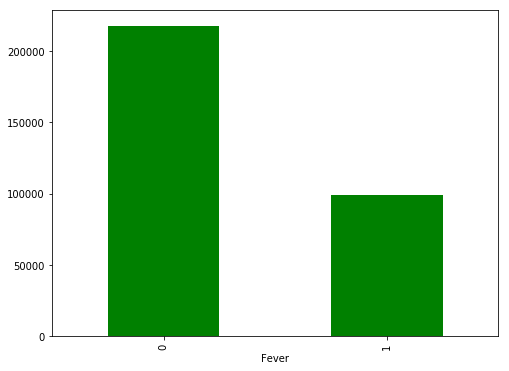

In [18]:
plt.figure(figsize=(8,6))
data.groupby('Fever').size().plot(color='green',kind='bar')
plt.show()

<Figure size 1080x720 with 0 Axes>

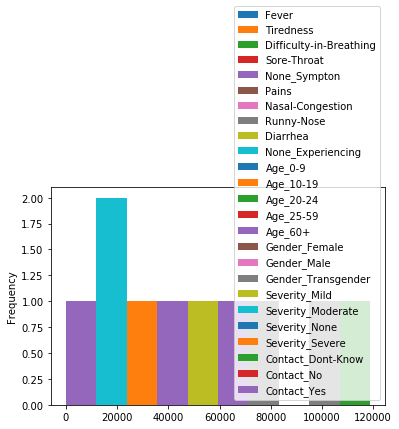

In [19]:
plt.figure(figsize=(15,10))
data.groupby('Dry-Cough').sum().plot(kind='hist')
plt.show()